In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('final_dataset.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df["Team_Batting"].unique()

array(['KKR', 'CSK', 'GT', 'DC', 'PBKS', 'SRH', 'LSG', 'RR', 'RCB', 'MI'],
      dtype=object)

In [5]:
df.head(2)

,Unnamed: 0.1,Season,Match,Innings,Over,Bowler,Batsman,Result,Team_Batting,Commentary,Line,Length,result_modified,Phase,Is_Bat_Struggled,Is_Bat_Zone
0,0,2022,1,2,18.3,Adam Milne,Shreyas Iyer,4,KKR,"4 run(s), full length, outside leg stump, the ...",outside leg stump,full length ball,4,3,0,1
1,1,2022,1,2,18.2,Adam Milne,Shreyas Iyer,2,KKR,"2 run(s), good length, outside off stump, glid...",outside off stump,good length ball,2,3,0,0


# Objective 1

In [6]:
def get_bowler_strength_df(bowler, df):
    df_bowler = df[(df['Bowler'] == bowler) & (df['Is_Bat_Struggled'] == 1) ]
    strength_data = df_bowler.pivot_table(index='Length', columns='Line', values='Is_Bat_Struggled', aggfunc='sum')
    return strength_data.fillna(0)  # Replace NaN with 0

def get_bowler_weakness_df(bowler, df):
    df_bowler = df[(df['Bowler'] == bowler) & (df['Is_Bat_Zone'] == 1)]
    weakness_data = df_bowler.pivot_table(index='Length', columns='Line', values='Is_Bat_Zone', aggfunc='sum')
    return weakness_data.fillna(0)  # Replace NaN with 0

def get_bowler_frequency_df(bowler, df):
    curran_data = df[df['Bowler'] == bowler]
    frequency_table = pd.crosstab(curran_data['Length'], curran_data['Line'])
    return frequency_table



# Now we can use the functions to create the individual data frames for Sam Curran
strength_df = get_bowler_strength_df('Mohammad Shami', df)
weakness_df = get_bowler_weakness_df('Mohammad Shami', df)
frequency_df = get_bowler_frequency_df('Mohammad Shami', df)

# Define a function to format the annotations

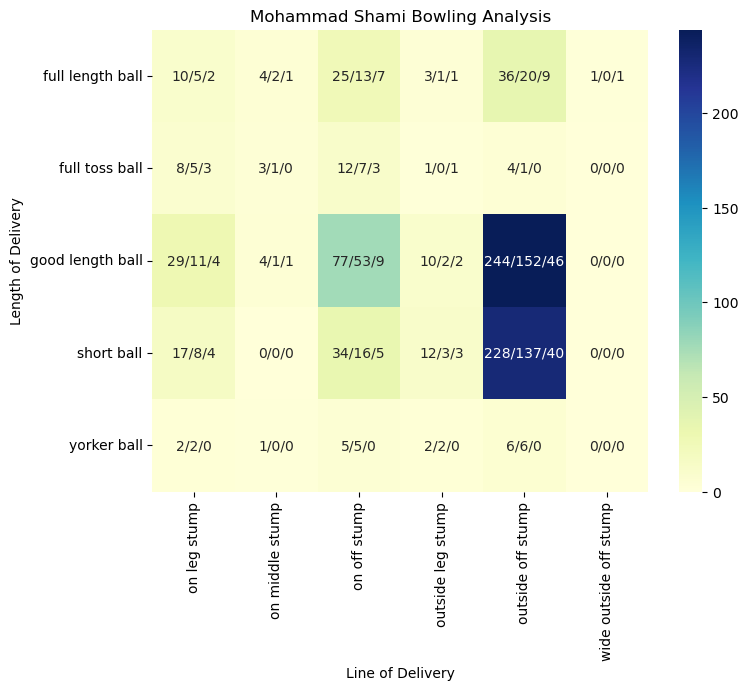

In [7]:
def format_annotations(total, struggled, punished):
    return f"{int(total)}/{int(struggled)}/{int(punished)}" if total > 0 else "0/0/0"

# an empty DataFrame with the same index and columns as the frequency DataFrame
combined_data = pd.DataFrame(index=frequency_df.index, columns=frequency_df.columns)

# Populate the combined DataFrame with formatted strings
for length in combined_data.index:
    for line in combined_data.columns:
        total = frequency_df.loc[length, line] if length in frequency_df.index and line in frequency_df.columns else 0
        struggled = strength_df.loc[length, line] if length in strength_df.index and line in strength_df.columns else 0
        punished = weakness_df.loc[length, line] if length in weakness_df.index and line in weakness_df.columns else 0
        combined_data.at[length, line] = format_annotations(total, struggled, punished)

# the heatmap using only the total deliveries for the color intensity
plt.figure(figsize=(8, 6))
sns.heatmap(frequency_df, annot=combined_data.to_numpy(), fmt='', cmap="YlGnBu")
plt.title('Mohammad Shami Bowling Analysis')
plt.xlabel('Line of Delivery')
plt.ylabel('Length of Delivery')
plt.show()


# Objective 2

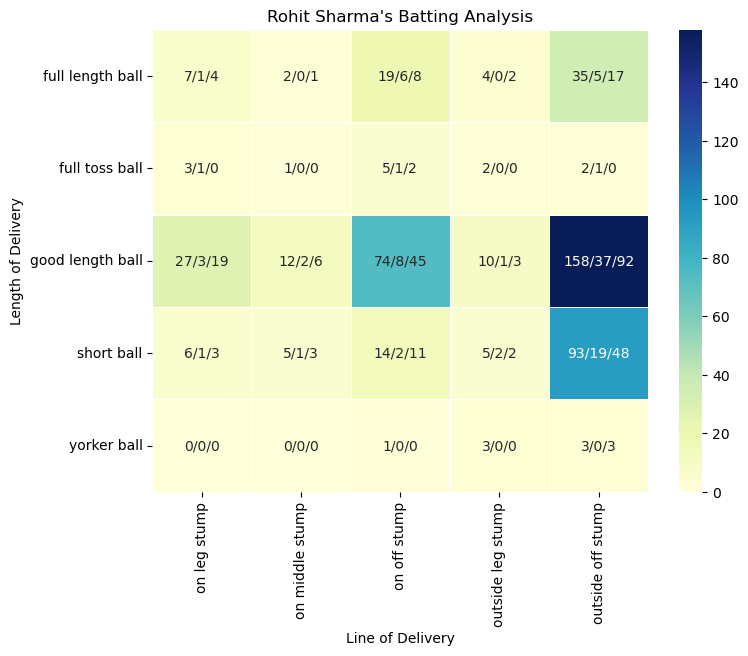

In [8]:
def analyze_and_visualize_batsman_performance(batsman, df):
    # Define the necessary functions
    def get_batsman_strength_df(batsman, df):
        df_batsman = df[(df['Batsman'] == batsman) & (df['Is_Bat_Zone'] == 1)]
        strength_data = df_batsman.pivot_table(index='Length', columns='Line', values='Is_Bat_Zone', aggfunc='sum')
        return strength_data.fillna(0)

    def get_batsman_weakness_df(batsman, df):
        df_batsman = df[(df['Batsman'] == batsman) & (df['Is_Bat_Struggled'] == 1)]
        weakness_data = df_batsman.pivot_table(index='Length', columns='Line', values='Is_Bat_Struggled', aggfunc='sum')
        return weakness_data.fillna(0)

    def get_batsman_frequency_df(batsman, df):
        batsman_data = df[df['Batsman'] == batsman]
        frequency_table = pd.crosstab(batsman_data['Length'], batsman_data['Line'])
        return frequency_table

    # Generate data frames
    strength_df = get_batsman_strength_df(batsman, df)
    weakness_df = get_batsman_weakness_df(batsman, df)
    frequency_df = get_batsman_frequency_df(batsman, df)

    # Combine data into a single DataFrame
    combined_data = pd.DataFrame(index=frequency_df.index, columns=frequency_df.columns)
    for length in combined_data.index:
        for line in combined_data.columns:
            total = frequency_df.loc[length, line] if line in frequency_df.columns and length in frequency_df.index else 0
            strength = strength_df.loc[length, line] if line in strength_df.columns and length in strength_df.index else 0
            weakness = weakness_df.loc[length, line] if line in weakness_df.columns and length in weakness_df.index else 0
            combined_data.at[length, line] = f"{int(total)}/{int(strength)}/{int(weakness)}"

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(frequency_df, annot=combined_data.to_numpy(), fmt='', cmap='YlGnBu', linewidths=.5)
    plt.title(f"{batsman}'s Batting Analysis")
    plt.xlabel('Line of Delivery')
    plt.ylabel('Length of Delivery')
    plt.show()

# Usage
analyze_and_visualize_batsman_performance('Rohit Sharma', df)


# Markov chain for Bolwer.
### can replace 'Bowler' with 'Batsman' and names for equivalent.
### I have used Line and Lengths interchangeably in the same code, Bowler and Batsman


In [10]:
# Filtering the data for deliveries bowled by Trent Boult
boult_deliveries = df[df['Bowler'] == 'Trent Boult']

# Analyzing the transitions in the 'Line' column to create a Markov chain
# We need to calculate the frequency of transitioning from one line to another

# Creating a pivot table to count the transitions
transition_matrix = pd.crosstab(boult_deliveries['Length'].shift(), boult_deliveries['Length'], normalize='index')

# Displaying the transition matrix
transition_matrix


Length,full length ball,full toss ball,good length ball,short ball,yorker ball
Length,,,,,
full length ball,0.193182,0.056818,0.420455,0.272727,0.056818
full toss ball,0.227273,0.136364,0.318182,0.272727,0.045455
good length ball,0.126394,0.026022,0.486989,0.349442,0.011152
short ball,0.133333,0.017778,0.395556,0.431111,0.022222
yorker ball,0.066667,0.200000,0.400000,0.266667,0.066667


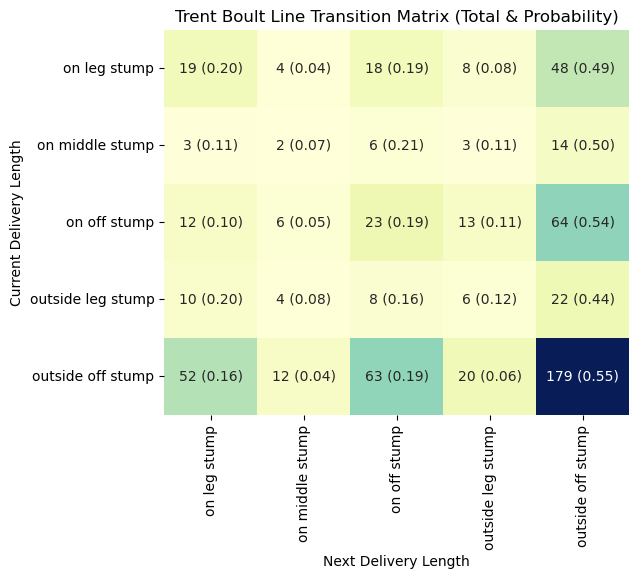

In [11]:
# Creating a pivot table to count the transitions (frequency)
transition_count_matrix = pd.crosstab(boult_deliveries['Line'].shift(), boult_deliveries['Line'])

# Creating a pivot table to calculate the probabilities of transitioning
transition_prob_matrix = pd.crosstab(boult_deliveries['Line'].shift(), boult_deliveries['Line'], normalize='index')

# Creating a combined matrix with both counts and probabilities
combined_matrix = transition_count_matrix.copy().astype(str)

# Inserting probabilities into the combined matrix
for row in combined_matrix.index:
    for col in combined_matrix.columns:
        prob = transition_prob_matrix.at[row, col]
        combined_matrix.at[row, col] += f" ({prob:.2f})"

# Creating a heatmap for the combined matrix
plt.figure(figsize=(6, 5))
sns.heatmap(transition_count_matrix, annot=combined_matrix, fmt="", cmap="YlGnBu", cbar=False)

plt.title('Trent Boult Line Transition Matrix (Total & Probability)')
plt.xlabel('Next Delivery Length')
plt.ylabel('Current Delivery Length')
plt.show()



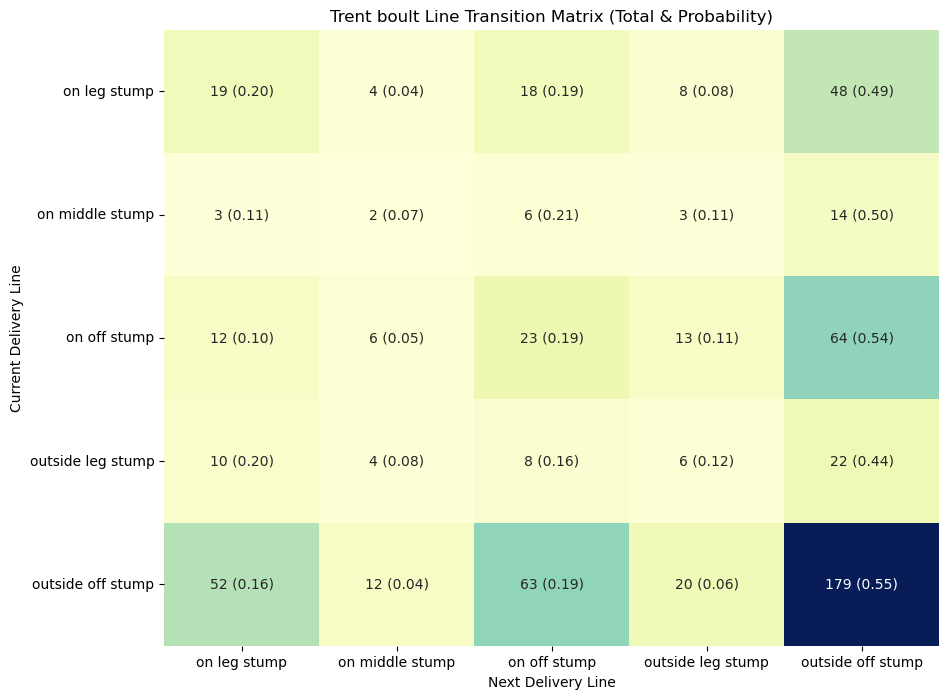

In [12]:
data=df
# Filtering the data for deliveries bowled by Trent Boult
boult_deliveries = data[data['Bowler'] == 'Trent Boult']

# Creating a pivot table to count the transitions (frequency)
transition_count_matrix = pd.crosstab(boult_deliveries['Line'].shift(), boult_deliveries['Line'])

# Creating a pivot table to calculate the probabilities of transitioning
transition_prob_matrix = pd.crosstab(boult_deliveries['Line'].shift(), boult_deliveries['Line'], normalize='index')

# Creating a combined matrix with both counts and probabilities
combined_matrix = transition_count_matrix.copy().astype(str)

# Inserting probabilities into the combined matrix
for row in combined_matrix.index:
    for col in combined_matrix.columns:
        prob = transition_prob_matrix.at[row, col]
        combined_matrix.at[row, col] += f" ({prob:.2f})"

# Creating a heatmap for the combined matrix
plt.figure(figsize=(10, 8))
sns.heatmap(transition_count_matrix, annot=combined_matrix, fmt="", cmap="YlGnBu", cbar=False)

plt.title('Trent boult Line Transition Matrix (Total & Probability)')
plt.xlabel('Next Delivery Line')
plt.ylabel('Current Delivery Line')
plt.show()



In [13]:
# Steady state Probabilities

In [14]:
# Modifying the code to analyze Trent Boult instead of Sam Curran

# Filtering the data for rows where Trent Boult is the bowler
trent_boult_data = data[data['Bowler'] == 'Trent Boult']

# Extracting the 'Length' column for Trent Boult's data
lengths_boult = trent_boult_data['Length']

# Getting unique lengths and creating a mapping for indices
unique_lengths_boult = lengths_boult.unique()
length_to_index_boult = {length: index for index, length in enumerate(unique_lengths_boult)}

# Initializing the transition matrix for lengths for Trent Boult
num_lengths_boult = len(unique_lengths_boult)
transition_matrix_lengths_boult = np.zeros((num_lengths_boult, num_lengths_boult))

# Populating the transition matrix for lengths for Trent Boult
for i in range(len(lengths_boult)-1):
    current_length = lengths_boult.iloc[i]
    next_length = lengths_boult.iloc[i+1]
    transition_matrix_lengths_boult[length_to_index_boult[current_length], length_to_index_boult[next_length]] += 1

# Normalizing the transition matrix for lengths for Trent Boult
transition_matrix_lengths_boult_normalized = np.nan_to_num(
    transition_matrix_lengths_boult / transition_matrix_lengths_boult.sum(axis=1, keepdims=True)
)

# Calculating the steady state probabilities for the lengths bowled by Trent Boult
eigenvalues_boult, eigenvectors_boult = np.linalg.eig(transition_matrix_lengths_boult_normalized.T)
steady_state_vector_boult = eigenvectors_boult[:, np.isclose(eigenvalues_boult, 1)].real
steady_state_vector_boult = steady_state_vector_boult / steady_state_vector_boult.sum()

# Mapping the steady state probabilities back to the length types for Trent Boult
steady_state_probabilities_boult = {length: steady_state_vector_boult[length_to_index_boult[length]][0] for length in unique_lengths_boult}

steady_state_probabilities_boult_df = pd.DataFrame([steady_state_probabilities_boult])

In [15]:
steady_state_probabilities_boult_df

,full length ball,good length ball,short ball,full toss ball,yorker ball
0,0.140432,0.436309,0.363648,0.035463,0.024148


In [16]:
# Modifying the code to analyze Trent Boult instead of Sam Curran

# Filtering the data for rows where Trent Boult is the bowler
trent_boult_data = data[data['Bowler'] == 'Trent Boult']

# Extracting the 'Line' column for Trent Boult's data
lines_boult = trent_boult_data['Line']

# Getting unique lines and creating a mapping for indices
unique_lines_boult = lines_boult.unique()
line_to_index_boult = {line: index for index, line in enumerate(unique_lines_boult)}

# Initializing the transition matrix for lines for Trent Boult
num_lines_boult = len(unique_lines_boult)
transition_matrix_lines_boult = np.zeros((num_lines_boult, num_lines_boult))

# Populating the transition matrix for lines for Trent Boult
for i in range(len(lines_boult)-1):
    current_line = lines_boult.iloc[i]
    next_line = lines_boult.iloc[i+1]
    transition_matrix_lines_boult[line_to_index_boult[current_line], line_to_index_boult[next_line]] += 1

# Normalizing the transition matrix for lines for Trent Boult
transition_matrix_lines_boult_normalized = np.nan_to_num(
    transition_matrix_lines_boult / transition_matrix_lines_boult.sum(axis=1, keepdims=True)
)

# Calculating the steady state probabilities for the lines bowled by Trent Boult
eigenvalues_boult, eigenvectors_boult = np.linalg.eig(transition_matrix_lines_boult_normalized.T)
steady_state_vector_boult = eigenvectors_boult[:, np.isclose(eigenvalues_boult, 1)].real
steady_state_vector_boult = steady_state_vector_boult / steady_state_vector_boult.sum()

# Mapping the steady state probabilities back to the line types for Trent Boult
steady_state_probabilities_boult = {line: steady_state_vector_boult[line_to_index_boult[line]][0] for line in unique_lines_boult}

steady_state_line_probabilities_boult_df=pd.DataFrame([steady_state_probabilities_boult])


In [17]:
steady_state_line_probabilities_boult_df

,on leg stump,outside off stump,on off stump,on middle stump,outside leg stump
0,0.155026,0.528367,0.190644,0.045225,0.080738


# Comparison of Bowlers

In [18]:
# Function to compare two bowlers and prepare data for the heatmap
def compare_bowlers(bowler_1, bowler_2, data):
    # Check if the bowlers are in the dataset
    if not ((data['Bowler'] == bowler_1).any() and (data['Bowler'] == bowler_2).any()):
        return pd.DataFrame()
    # Grouping and calculating counts and proportions
    bowler_line_length_counts = data.groupby(['Bowler', 'Length', 'Line']).size().reset_index(name='Count')
    bowler_total_deliveries = data.groupby('Bowler').size().reset_index(name='TotalDeliveries')
    bowler_line_length_proportions = pd.merge(bowler_line_length_counts, bowler_total_deliveries, on='Bowler')
    bowler_line_length_proportions['Proportion'] = (bowler_line_length_proportions['Count'] / bowler_line_length_proportions['TotalDeliveries']) * 100

    # Filtering data for the two bowlers
    bowler_1_data = bowler_line_length_proportions[bowler_line_length_proportions['Bowler'] == bowler_1]
    bowler_2_data = bowler_line_length_proportions[bowler_line_length_proportions['Bowler'] == bowler_2]

    # Combining data into a single DataFrame
    combined_data = pd.DataFrame()
    for bowler_data in [bowler_1_data, bowler_2_data]:
        combined_data = combined_data.append(bowler_data, ignore_index=True)

    return combined_data

# User input for bowlers
bowler_1 = input("Enter Bowler 1 name: ")
bowler_2 = input("Enter Bowler 2 name: ")

# Use the function to get the data for heatmap
heatmap_data = compare_bowlers(bowler_1, bowler_2, data)

# Check if heatmap data is empty
if heatmap_data.empty:
    print("No data found for the given bowlers. Please check the bowler names.")
else:
    # Preparing data for the heatmap
    count_data = heatmap_data.pivot_table(index=['Length', 'Line'], columns='Bowler', values='Count', fill_value=0)
    proportion_data = heatmap_data.pivot_table(index=['Length', 'Line'], columns='Bowler', values='Proportion', fill_value=0)
    combined_heatmap_data = count_data.astype(str) + ' (' + proportion_data.round(2).astype(str) + '%)'
    combined_annotations = combined_heatmap_data.applymap(lambda x: x.replace('0 (0.0%)', ''))

    # Creating the heatmap
    plt.figure(figsize=(6, 10))
    sns.heatmap(count_data, annot=combined_annotations, fmt='s', cmap="YlGnBu", linewidths=.5, cbar=False)
    plt.title('Combined Delivery Counts and Proportions ')
    plt.show()


KeyboardInterrupt: Interrupted by user

# Expensive Overs

In [19]:
data=pd.read_excel('overs_with_9_or_more_runs (1).xlsx')

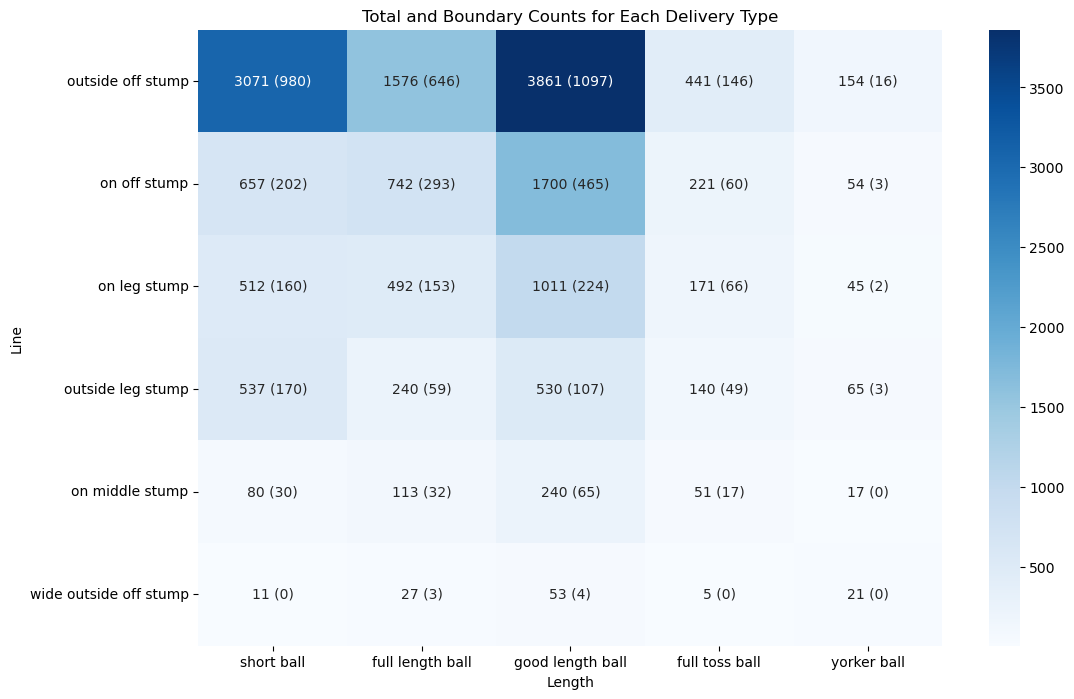

In [22]:
#create the heatmap with total counts and boundary counts in each cell
unique_lines=data['Line'].unique()
unique_lengths=data['Length'].unique()
# Creating a new DataFrame for the heatmap
heatmap_data = pd.DataFrame(index=unique_lines, columns=unique_lengths, data='0 (0)')

# Populating the DataFrame with total count and boundary count for each line-length combination
for line in unique_lines:
    for length in unique_lengths:
        total_count = data[(data['Line'] == line) & (data['Length'] == length)].shape[0]
        boundary_count = data[(data['Line'] == line) & (data['Length'] == length) & (data['Is_Bat_Zone'] == 1)].shape[0]
        heatmap_data.loc[line, length] = f"{total_count} ({boundary_count})"

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.applymap(lambda x: int(x.split()[0])), annot=heatmap_data.values, fmt="", cmap='Blues')
plt.title("Total and Boundary Counts for Each Delivery Type")
plt.xlabel("Length")
plt.ylabel("Line")
plt.show()
